In [1]:
import os as os
import pandas as pd

In [2]:
happy_score_df = pd.read_csv(os.path.join('Data', 'TheHappyCo.csv'))
happy_score_df = happy_score_df[['Country name', 'Score Y19']]
print(happy_score_df)
happy_score_df.head()

Country name  Score Y19
0                     Finland      7.769
1                     Denmark      7.600
2                 Switzerland      7.480
3                     Iceland      7.494
4                      Norway      7.554
..                        ...        ...
148  Central African Republic      3.083
149                    Rwanda      3.334
150                  Zimbabwe      3.663
151               South Sudan      2.853
152               Afghanistan      3.203

[153 rows x 2 columns]


,Country name,Score Y19
0,Finland,7.769
1,Denmark,7.600
2,Switzerland,7.480
3,Iceland,7.494
4,Norway,7.554


In [3]:
HappinessAlcoholConsumption_df = pd.read_csv(os.path.join('Resources','HappinessAlcoholConsumption.csv'))
HappinessAlcoholConsumption_df['Alcohol_PerCapita'] = HappinessAlcoholConsumption_df[['Beer_PerCapita','Spirit_PerCapita','Wine_PerCapita']].sum(axis=1)
print(HappinessAlcoholConsumption_df.info())
HappinessAlcoholConsumption_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            122 non-null    object 
 1   Region             122 non-null    object 
 2   Hemisphere         122 non-null    object 
 3   HappinessScore     122 non-null    float64
 4   HDI                122 non-null    int64  
 5   GDP_PerCapita      122 non-null    float64
 6   Beer_PerCapita     122 non-null    int64  
 7   Spirit_PerCapita   122 non-null    int64  
 8   Wine_PerCapita     122 non-null    int64  
 9   Alcohol_PerCapita  122 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 9.7+ KB
None


,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Alcohol_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,583
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,565
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,372
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,369
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,493


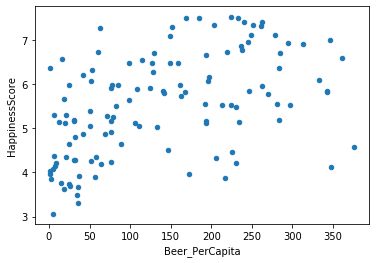

In [4]:
HappinessAlcoholConsumption_df.plot(kind='scatter',x='Beer_PerCapita',y='HappinessScore')

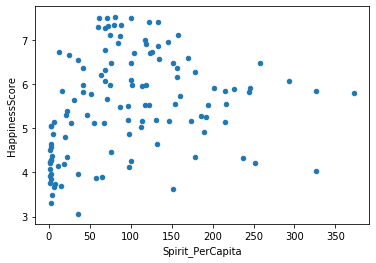

In [5]:
HappinessAlcoholConsumption_df.plot(kind='scatter',x='Spirit_PerCapita',y='HappinessScore')

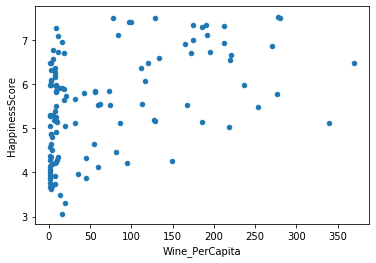

In [6]:
HappinessAlcoholConsumption_df.plot(kind='scatter',x='Wine_PerCapita',y='HappinessScore')

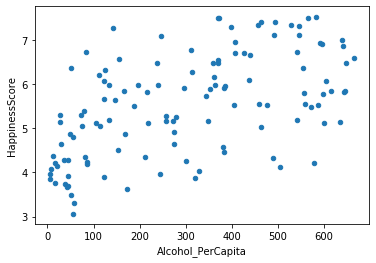

In [7]:
HappinessAlcoholConsumption_df.plot(kind='scatter',x='Alcohol_PerCapita',y='HappinessScore')

In [8]:
alcohol_df = pd.read_csv(os.path.join('Resources', 'Alcohol2019.csv'))
alcohol_df = alcohol_df.rename(columns={'Liters of pure alcohol consumed per capita':'Alcohol Consumed'})
print(alcohol_df.info())
alcohol_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              25 non-null     int64  
 1   Country           25 non-null     object 
 2   Alcohol Consumed  25 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 728.0+ bytes
None


,Rank,Country,Alcohol Consumed
0,1,Belarus,17.5
1,2,Moldova,16.8
2,3,Lithuania,15.4
3,4,Russia,15.1
4,5,Romania,14.4
5,6,Ukraine,13.9
6,7,Andorra,13.8
7,8,Hungary,13.3
8,9,Czech Republic,13.0
9,10,Slovakia,13.0


In [9]:
alcohol_df = alcohol_df.merge(happy_score_df, how='inner',left_on='Country',right_on='Country name')
alcohol_df

,Rank,Country,Alcohol Consumed,Country name,Score Y19
0,1,Belarus,17.5,Belarus,5.323
1,2,Moldova,16.8,Moldova,5.529
2,3,Lithuania,15.4,Lithuania,6.149
3,4,Russia,15.1,Russia,5.648
4,5,Romania,14.4,Romania,6.070
5,6,Ukraine,13.9,Ukraine,4.332
6,8,Hungary,13.3,Hungary,5.758
7,9,Czech Republic,13.0,Czech Republic,6.852
8,10,Slovakia,13.0,Slovakia,6.198
9,11,Portugal,12.9,Portugal,5.693


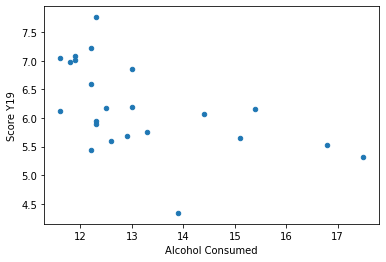

In [11]:
alcohol_df.plot(kind='scatter', x='Alcohol Consumed',y='Score Y19')